# My Potential Model 

In [78]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Loading in data and cleaning it 

In [2]:
df = pd.read_csv('PipelineMLData.csv')

In [3]:
df['CurrentOppAmt'] = df['CurrentOppAmt'].fillna(df['CurrentOppAmt'].median())
df['QualifiedAmt'] = df['QualifiedAmt'].fillna(df['QualifiedAmt'].median())

In [4]:
dropCols =['OppId','Industry']
df.drop(labels=dropCols,axis=1)

,PipelineRange,CurrentOppAmt,IsWon,QualifiedAmt,OwnerTitle,SalesOffice,SalesRegion,NumerOfEmployees,AccountScore,IsClosed,DaysPushed,MonthsOpen,OppClosedDate
0,p4-6,1700.0,1.0,1700.0,Regional Sales Team Lead,Atlanta,Southern,184235.0,28.0,1.0,69.0,4.0,8/6/2019
1,p0-3,51.0,1.0,500.0,Account Executive,Inside Sales,SMB,2.0,23.0,1.0,0.0,0.0,4/1/2019
2,p10-12,500.0,0.0,500.0,Senior Account Executive,Newark,New York,49739.0,96.0,1.0,69.0,11.0,3/9/2020
3,p13+,2575.0,0.0,500.0,Customer Success Manager,Support,Customer Success,130.0,34.0,1.0,548.0,21.0,1/29/2021
4,p0-3,425.0,0.0,500.0,Senior Account Executive,Birmingham,Southern,500.0,41.0,1.0,31.0,1.0,5/31/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21109,p13+,500.0,0.0,500.0,Senior Account Executive,Oklahoma City,Rocky Mountain,42.0,22.0,1.0,362.0,13.0,5/27/2020
21110,p0-3,275.0,0.0,299.0,Senior Account Executive,Boston,New England,656.0,33.0,1.0,54.0,3.0,7/23/2019
21111,p13+,500.0,0.0,500.0,Senior Account Executive,Newark,New York,500.0,37.0,1.0,273.0,14.0,6/30/2020
21112,p13+,500.0,0.0,500.0,Senior Account Executive,Philadelphia,Mid Atlantic,1047.0,51.0,1.0,535.0,23.0,3/15/2021


In [5]:
df.PipelineRange.unique()

array(['p4-6', 'p0-3', 'p10-12', 'p13+', 'p7-9', nan], dtype=object)

In [6]:
df['PipRange_p0_3'] = np.where(df['PipelineRange']=='p0-3',1,0)
df['PipRange_p4_6'] = np.where(df['PipelineRange']=='p4-6',1,0)
df['PipRange_p7_9'] = np.where(df['PipelineRange']=='p7-9',1,0)
df['PipRange_p10_12'] = np.where(df['PipelineRange']=='p10-12',1,0)
df['PipRange_p13'] = np.where(df['PipelineRange']=='p13+',1,0)




In [7]:
df.SalesRegion.unique()
df['Southern']=np.where(df['SalesRegion']=='Southern',1,0)
df['SMB']=np.where(df['SalesRegion']=='SMB',1,0)
df['New_York']=np.where(df['SalesRegion']=='New York',1,0)
df['Customer_Success']=np.where(df['SalesRegion']=='Customer Success',1,0)
df['Coastal']=np.where(df['SalesRegion']=='Coastal',1,0)
df['Channel_Sales']=np.where(df['SalesRegion']=='Channel Sales',1,0)
df['Mid_Atlantic']=np.where(df['SalesRegion']=='Mid Atlantic',1,0)
df['New_England']=np.where(df['SalesRegion']=='New England',1,0)
df['Central']=np.where(df['SalesRegion']=='Central',1,0)
df['Red_River']=np.where(df['SalesRegion']=='Red River',1,0)
df['Mid_West']=np.where(df['SalesRegion']=='Mid Western',1,0)
df['SoCal']=np.where(df['SalesRegion']=='SoCal',1,0)
df['Rocky_Mtn']=np.where(df['SalesRegion']=='Rocky Mountain',1,0)
df['Enterprise']=np.where(df['SalesRegion']=='Enterprise',1,0)
df['Marketing_in']=np.where(df['SalesRegion']=='Marketing Inbound',1,0)


In [8]:
df.head()

,PipelineRange,CurrentOppAmt,IsWon,QualifiedAmt,OwnerTitle,SalesOffice,SalesRegion,Industry,NumerOfEmployees,AccountScore,...,Channel_Sales,Mid_Atlantic,New_England,Central,Red_River,Mid_West,SoCal,Rocky_Mtn,Enterprise,Marketing_in
0,p4-6,1700.0,1.0,1700.0,Regional Sales Team Lead,Atlanta,Southern,Finance,184235.0,28.0,...,0,0,0,0,0,0,0,0,0,0
1,p0-3,51.0,1.0,500.0,Account Executive,Inside Sales,SMB,Technology,2.0,23.0,...,0,0,0,0,0,0,0,0,0,0
2,p10-12,500.0,0.0,500.0,Senior Account Executive,Newark,New York,Insurance,49739.0,96.0,...,0,0,0,0,0,0,0,0,0,0
3,p13+,2575.0,0.0,500.0,Customer Success Manager,Support,Customer Success,Manufacturing,130.0,34.0,...,0,0,0,0,0,0,0,0,0,0
4,p0-3,425.0,0.0,500.0,Senior Account Executive,Birmingham,Southern,Manufacturing,500.0,41.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
to_drop = ['PipelineRange','OppClosedDate','OppId','Industry','SalesRegion','SalesOffice','OwnerTitle']

In [25]:
df_final = df.drop(labels=to_drop,axis=1)

In [26]:
df_closed = df_final[df_final['IsClosed']==1]

In [27]:
df_closed.head()

,CurrentOppAmt,IsWon,QualifiedAmt,NumerOfEmployees,AccountScore,IsClosed,DaysPushed,MonthsOpen,PipRange_p0_3,PipRange_p4_6,...,Channel_Sales,Mid_Atlantic,New_England,Central,Red_River,Mid_West,SoCal,Rocky_Mtn,Enterprise,Marketing_in
0,1700.0,1.0,1700.0,184235.0,28.0,1.0,69.0,4.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,51.0,1.0,500.0,2.0,23.0,1.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,500.0,0.0,500.0,49739.0,96.0,1.0,69.0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2575.0,0.0,500.0,130.0,34.0,1.0,548.0,21.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,425.0,0.0,500.0,500.0,41.0,1.0,31.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df_closed.shape()

NameError: name 'df_closed' is not defined

# Analysis 
Have created a dataset to use for analysis called df_closed

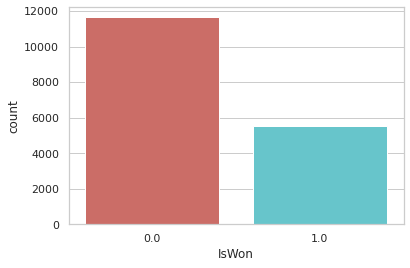

In [12]:
sns.countplot(x='IsWon',data=df_closed,palette='hls')
plt.show()


In [13]:
count_lost = len(df_closed[df_closed['IsWon']==0])
count_won = len(df_closed[df_closed['IsWon']==1])
pct_won = count_won/(count_lost+count_won)
print('percentage of opps won:',pct_won*100)

percentage of opps won: 32.28113010115103


In [14]:
df_closed.groupby('IsWon').mean()

,CurrentOppAmt,QualifiedAmt,NumerOfEmployees,AccountScore,IsClosed,DaysPushed,MonthsOpen,PipRange_p0_3,PipRange_p4_6,PipRange_p7_9,...,Channel_Sales,Mid_Atlantic,New_England,Central,Red_River,Mid_West,SoCal,Rocky_Mtn,Enterprise,Marketing_in
IsWon,,,,,,,,,,,,,,,,,,,,,
0.0,2148.625391,1382.331387,12856.007984,50.130655,1.0,114.878359,6.697828,0.46107,0.186454,0.118637,...,0.049961,0.077517,0.026526,0.063353,0.080264,0.097691,0.025582,0.071508,0.054597,0.000086
1.0,1183.138637,974.687801,6868.202593,47.022871,1.0,29.173960,1.573384,0.87052,0.069152,0.030974,...,0.071493,0.036557,0.033675,0.081938,0.078156,0.103368,0.017468,0.066451,0.091842,0.000180


In [31]:
df_closed.head()

,CurrentOppAmt,IsWon,QualifiedAmt,NumerOfEmployees,AccountScore,IsClosed,DaysPushed,MonthsOpen,PipRange_p0_3,PipRange_p4_6,...,Channel_Sales,Mid_Atlantic,New_England,Central,Red_River,Mid_West,SoCal,Rocky_Mtn,Enterprise,Marketing_in
0,1700.0,1.0,1700.0,184235.0,28.0,1.0,69.0,4.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,51.0,1.0,500.0,2.0,23.0,1.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,500.0,0.0,500.0,49739.0,96.0,1.0,69.0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2575.0,0.0,500.0,130.0,34.0,1.0,548.0,21.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,425.0,0.0,500.0,500.0,41.0,1.0,31.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_closed.dtypes

CurrentOppAmt       float64
IsWon               float64
QualifiedAmt        float64
NumerOfEmployees    float64
AccountScore        float64
IsClosed            float64
DaysPushed          float64
MonthsOpen          float64
PipRange_p0_3         int64
PipRange_p4_6         int64
PipRange_p7_9         int64
PipRange_p10_12       int64
PipRange_p13          int64
Southern              int64
SMB                   int64
New_York              int64
Customer_Success      int64
Coastal               int64
Channel_Sales         int64
Mid_Atlantic          int64
New_England           int64
Central               int64
Red_River             int64
Mid_West              int64
SoCal                 int64
Rocky_Mtn             int64
Enterprise            int64
Marketing_in          int64
dtype: object

In [34]:
x = df_closed.loc[:,df_closed.columns != 'IsWon']
y = df_closed.loc[:,df_closed.columns=='IsWon'] 

# Begining to create model 
Logistic Regression model

In [38]:
os = SMOTE(random_state=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=0)
columns = x_train.columns

In [39]:
os_data_x,os_data_y = os.fit_sample(x_train,y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns)
os_data_y = pd.DataFrame(data=os_data_y,columns=['IsWon'])


In [94]:
data_final_vars = df_closed.columns.values.tolist()
y = ['IsWon']
x=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()

rfe = RFE(logreg,22)
rfe = rfe.fit(os_data_x,os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


/home/mellemaa/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=22 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/mellemaa/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/mellemaa/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

[False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False]
[4 3 5 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6]


/home/mellemaa/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/mellemaa/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

In [95]:
index = 0 
columns=list(df_closed.columns)
columns.remove('IsWon')

cols = []
for i in rfe.ranking_:
    if i == 1:
        cols.append(columns[index])
    index+=1

   

In [96]:
x = os_data_x[cols]
y = os_data_y['IsWon']

In [97]:
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.396622
         Iterations: 35
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.428     
Dependent Variable:   IsWon              AIC:                13013.5457
Date:                 2021-04-14 17:25   BIC:                13182.9893
No. Observations:     16350              Log-Likelihood:     -6484.8   
Df Model:             21                 LL-Null:            -11333.   
Df Residuals:         16328              LLR p-value:        0.0000    
Converged:            0.0000             Scale:              1.0000    
No. Iterations:       35.0000                                          
-----------------------------------------------------------------------
                  Coef.   Std.Err.    z     P>|z|    [0.025     0.975] 
-----------------------------------------------------------------------
IsClosed          35.2042 707.7663   0.0497 0.9603 -1351.9923 1422.4007
DaysPushed         0.0035  

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/home/mellemaa/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [99]:
y_pred = logreg.predict(x_test)
print('Accuracy of it is: {:.2f}'.format(logreg.score(x_test,y_test)))

Accuracy of it is: 0.82


# Analysis of Model 
able to develop a logistic regression model with 82 percent accuracy 

now looking to learn more about this model 

### Confusion Matrix

In [79]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[2052  414]
 [ 484 1955]]


Confusion matrix shows us:
  - we have 898 incorrect prediction
  - we have 4007 correct predictions

### looking at precision, recall, f1 score and support

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      2466
         1.0       0.83      0.80      0.81      2439

    accuracy                           0.82      4905
   macro avg       0.82      0.82      0.82      4905
weighted avg       0.82      0.82      0.82      4905



# ROC Curve to look at model

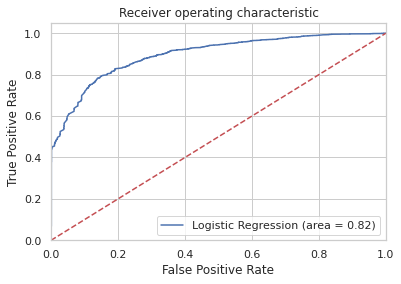

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# References:
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Data provided by Service Express